# **TalkingData AdTracking Fraud Detection Challenge**
*19/08/2021 -*

[![Github](https://img.shields.io/badge/gustavolq-100000?style=plastic&logo=github&logoColor=white)](https://github.com/gustavolq)
[![linkedin](https://img.shields.io/badge/gustavoquadra-%230077B5.svg?style=plastic&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/gustavoquadra)
![Python](https://img.shields.io/badge/Python-3776AB?style=plastic&logo=python&logoColor=ffd43b&color=306998)

<p style="text-align:center;"><img src = "https://www.thebeijinger.com/sites/default/files/thebeijinger/event-images/376094/screen_shot_2018-05-29_at_10.08.48_am.png" width = '1000' height = '600'></p>

Olá! Seja muito bem-vindo ao meu projeto de detecção de fraude de cliques da TalkingData.

Para realização do projeto utilizei o Jupyter Notebook, um aplicativo open-source que permite a execução de células com códigos e textos, junto com a Linguagem Python, uma linguagem de programação muito utilizada para a manipulação, análise e visualização de dados, assim como o desenvolvimento de Machine Learning.

### **Sumário do Projeto**

1. **Introdução**
2. **Definição do Problema de Negócio**
3. **Preparação dos Dados**
4. **Análise Exploratória dos Dados**
5. **Pré-Processamento**
6. **Criação do Modelo de Machine Learning**
7. **Otimização do Modelo de Machine Learning**
8. **Conclusão**
9. **Contato**

# **1. Introdução**

O projeto de detecção de fraudes em cliques em anúncios foi um desafio proposto pela empresa chinesa [TalkingData](https://www.talkingdata.com/) em 2018 na comunidade [Kaggle](https://www.kaggle.com/), uma plataforma voltada para Cientista de Dados e profissionais de Inteligência Artificial.

## **1.1 TalkingData**
<img align="left" alt="GIF" src="https://github.com/gustavolq/Projects/blob/main/TalkingData-FraudDetection-Challenge/assets/TalkingDataGif.gif?raw=true" width="400" height="310"/>  A TalkingData, maior plataforma de Big Data independente da China, cobre mais de 70% dos dispositivos móveis ativos em todo o país, lidando com 3 bilhões de cliques por dia, dos quais 90% são potencialmente fraudulentos.

Sua abordagem atual para impedir fraudes de cliques para desenvoledores de aplicativos é medir a jornada do clique de um usuário em todo o portfólio e sinalizar endereços IP que produzem muitos cliques, mas nunca acabam instalando aplicativos, realizando a criação de uma lista negra de IPs e dispositivos.

Embora bem-sucediso, eles querem estar sempre um passo à frente dos fraudadores e desejam desenvolver ainda mais a solução a partir da criação de um algoritmo que possa prever se um usuário fará o download de um aplicativo depois de clicar em um anúncio de aplicativo para dispositivos móveis.

Caso você queira saber um pouco mais sobre a TalkingData, podes acessar o site da empresa clicando [aqui](https://talkingdata.com).

# **2. Definição do Problema de Negócio**
Para esse projeto, iremos realizar a criação de um modelo de Machine Learning (Aprendizado de Máquina) que será utilizado para determinar se um clique é fraudulento ou não.

O projeto será realizado utilizando a linguagem de programação [Python](https://www.python.org/) e os dados disponibilizados no Kaggle, que você pode acessar clicando [aqui](https://www.kaggle.com/c/talkingdata-adtracking-fraud-detection/data).

# **3. Preparação dos Dados**

## **3.1 Importação dos Pacotes Utilizados**

In [2]:
# Remoção de Warnings
import warnings
warnings.filterwarnings('ignore')

# Pacote para manipulação dos dados
import pandas as pd

# Pacote para geração de gráficos
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set() # Setar o estilo do seaborn para o gráfico.

## **3.2 Importação dos Dados Utilizados**

Para a realização do projeto, iremos realizar a separação em dados de treino (train.csv) para realizar o treinamento do nosso modelo de Machine Learning e em dados de teste (test.csv) utilizados para descobrirmos o quão bem o nosso modelo se saiu.

Informação sobre os dados :
- train.csv : Dados de treino com 184.903.891 linhas e 8 colunas.
- test.csv : Dados de teste com 18.790.470 linhas e 7 colunas.

Devido à limitação de upload no GitHub, irei apenas disponibilizar os dados após a realização dos processos de separação / amostragem / limpeza.

### **3.2.1 Importação dos Dados de Treino**

Nessa etapa, iremos realizar a importação dos dados de treino (train.csv).

Segundo a [documentação oficial](https://www.kaggle.com/c/talkingdata-adtracking-fraud-detection/data) do projeto os dados de treino possuem 184.903.891 linhas e 8 colunas.

Suas colunas estão distribuídas da seguinte forma :

<table>
  <tr>
    <th>Variável</th>
    <th>Descrição</th>
  </tr>

  <tr>
    <th>ip</th>
    <th>Define o endereço IP do clique.</th>
  </tr>

  <tr>
    <th>app</th>
    <th>Define o ID do aplicativo ao qual o anúncio se refere.</th>
  </tr>

  <tr>
    <th>device</th>
    <th>Define o ID do dispositivo do usuário.</th>
  </tr>

  <tr>
    <th>os</th>
    <th>Define o ID do sistema operacional do dispositivo do usuário.</th>
  </tr>

  <tr>
    <th>channel</th>
    <th>Define o ID do canal de anúncios.</th>
  </tr>

  <tr>
    <th>click_time</th>
    <th>Define a data e o horário do clique.</th>
  </tr>

  <tr>
    <th>attributed_time</th>
    <th>Define a data e o horário do Download (se o usuário realizar).</th>
  </tr>

  <tr>
    <th>is_attributed</th>
    <th>Variável que será prevista, define se foi realizado o Download ou não do aplicativo.</th>
  </tr>

</table>

**OBS** : As colunas **ip**, **app**, **device**, **os** e **channel** estão codificadas.

In [3]:
# Definindo os nomes dos arquivos de treino
file_names = ['train1.csv', 'train2.csv', 'train3.csv', 'train4.csv', 'train5.csv']

# Carregando train1.csv na memória
file = pd.read_csv(f'Data/{file_names[0]}')

# Definição dos nomes das colunas
col_name = file.columns

# Demonstrando as 10 primeiras linhas do dataset
file.head(10)

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,83230,3,1,13,379,2017-11-06 14:32:21,NaN,0
1,17357,3,1,19,379,2017-11-06 14:33:34,NaN,0
2,35810,3,1,13,379,2017-11-06 14:34:12,NaN,0
3,45745,14,1,13,478,2017-11-06 14:34:52,NaN,0
4,161007,3,1,13,379,2017-11-06 14:35:08,NaN,0
5,18787,3,1,16,379,2017-11-06 14:36:26,NaN,0
6,103022,3,1,23,379,2017-11-06 14:37:44,NaN,0
7,114221,3,1,19,379,2017-11-06 14:37:59,NaN,0
8,165970,3,1,13,379,2017-11-06 14:38:10,NaN,0
9,74544,64,1,22,459,2017-11-06 14:38:23,NaN,0


Também iremos realizar uma pequena análise exploratória em cima da variável ```is_attributed``` para verificarmos se a mesma se encontra balanceada.

Essa é uma etapa muito necessária em previsões classificação (0 ou 1, Sim ou Não), pois, caso tenha um alto desbalanceamento entre os valores, nosso modelo preditivo irá aprender a identificar mais quando um indivíduo não realiza o download do que quando realiza.

In [4]:
def verificaBalanc(index) : # Criação de uma função para retornar a quantidade de valores 0 (No) e 1 (Yes) por arquivo
  
  if index == 0 :
    file_func = pd.read_csv(f"Data/{file_names[index]}", header=0)
  else :
    file_func = pd.read_csv(f"Data/{file_names[index]}", header=None, names=col_name)
  
  file_func.drop_duplicates(inplace=True) # Remoção dos valores duplicados
  
  dict_return = {'File' : file_names[index], 'No' : file_func['is_attributed'].value_counts().loc[0], 'Yes' : file_func['is_attributed'].value_counts().loc[1]}
  return dict_return

count_attributed = pd.DataFrame(columns=['File', 'No', 'Yes'])
for index in range(len(file_names)) :
  count_attributed = count_attributed.append(verificaBalanc(index), ignore_index = True)

count_attributed.set_index("File",inplace=True)
count_attributed  

,No,Yes
File,,
train1.csv,36182494,93859
train2.csv,36189295,86647
train3.csv,36103239,102242
train4.csv,36169122,80839
train5.csv,36183660,93258


In [5]:
count_attributed_total = pd.DataFrame({'No' : count_attributed['No'].sum(), 'Yes' : count_attributed['Yes'].sum()}, index = [0])
count_attributed_total['No %'] = count_attributed_total['No'].sum() / (count_attributed_total['No'].sum() + count_attributed_total['Yes'].sum()) * 100
count_attributed_total['Yes %'] = count_attributed_total['Yes'].sum() / (count_attributed_total['No'].sum() + count_attributed_total['Yes'].sum()) * 100
count_attributed_total

,No,Yes,No %,Yes %
0,180827810,456845,99.747996,0.252004


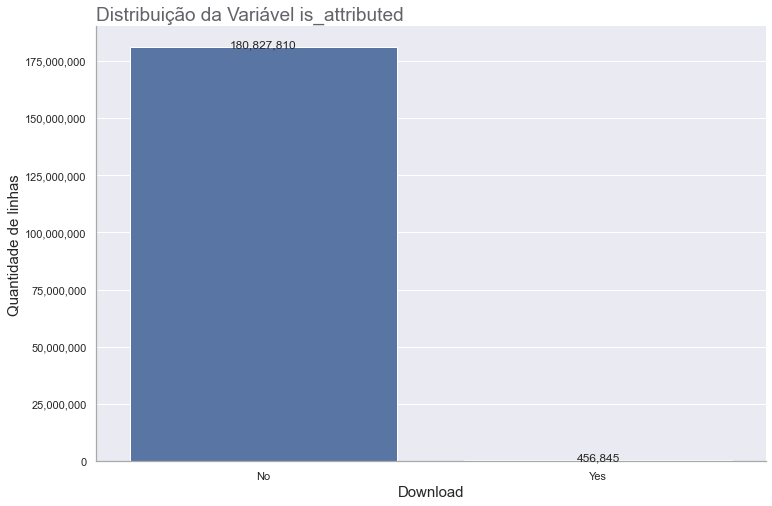

In [6]:
fig, ax = plt.subplots(figsize = (12,8))

sns.barplot(data = count_attributed_total[['No', 'Yes']], ax=ax)

ax.set_title("Distribuição da Variável is_attributed", fontsize = 19, loc = 'left', color = '#646369')
ax.set_xlabel("Download", fontsize = 15)
ax.set_ylabel("Quantidade de linhas", fontsize = 15)
ax.set_xticklabels(['No', 'Yes'])
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

ax.spines['bottom'].set_color('darkgrey')
ax.spines['left'].set_color('darkgrey')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for p in ax.patches:
  _x = p.get_x() + p.get_width() / 2
  _y = p.get_y() + p.get_height()
  value = '{:,.0f}'.format(p.get_height())
  ax.text(_x, _y, value, ha="center")

ax.set_ylim(0, 190000000)

plt.show()

#### **Balanceando os Dados**
Acima, conseguimos realizar a verificação de que **180.827.810** (**99.74%** dos dados) registros em nossa tabela (após remoção dos duplicados) possuem valores definidos como **0** (No) e apenas **456.845** (**0.25%** dos dados) valores como **1** (Yes) para a nossa variável ```is_attributed```.

Essa diferença é um grave problema para a construção do nosso modelo preditivo, pois, os fará aprender a identificar mais quando um indivíduo não efetua um download do que quando efetua e precisamos encontrar uma solução para essa situação.

Para isso, iremos realizar a construção de um novo arquivo csv que irá conter a mesma quantidade de linhas para cada resultado (No e Yes) da variável ```is_attributed``` para mantermos uma proporção balanceada.

Para a solução desse problema iremos utilizar todas as linhas de quando a variável is_attributed for 1 e realizar uma amostragem dos valores de is_attributed que sejam 0.

In [28]:
def dataframeBalanc(index) : # Criação de uma função para retornar um DataFrame balanceado
  
  if index == 0 :
    file_func = pd.read_csv(f"Data/{file_names[index]}", header=0)
  else :
    file_func = pd.read_csv(f"Data/{file_names[index]}", header=None, names=col_name)
  
  file_func.drop_duplicates(inplace=True) # Remoção dos valores duplicados
  
  file_func_0 = file_func.loc[file_func['is_attributed'] == 0]
  file_func_1 = file_func.loc[file_func['is_attributed'] == 1]
  file_func_final = file_func_1.append(file_func_0.sample(n=len(file_func_1))) # Realiza a amostragem

  return file_func_final

train = pd.DataFrame(columns = col_name)

for index in range(len(file_names)) :
  train = train.append(dataframeBalanc(index), ignore_index = True)

train.to_csv('Data/train.csv', index = False) # Salva o arquivo balanceado como train.csv

In [49]:
train = pd.read_csv('Data/train.csv')
train = train.sort_values(by='click_time', ignore_index=True)
train.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,204158,35,1,13,21,2017-11-06 15:41:07,2017-11-07 08:17:19,1
1,147948,3,1,19,379,2017-11-06 15:58:41,NaN,0
2,36213,6,1,18,459,2017-11-06 16:00:01,NaN,0
3,145426,2,1,19,452,2017-11-06 16:00:01,NaN,0
4,50915,6,1,18,459,2017-11-06 16:00:02,NaN,0


In [48]:
train['is_attributed'].value_counts()

1    456845
0    456845
Name: is_attributed, dtype: int64

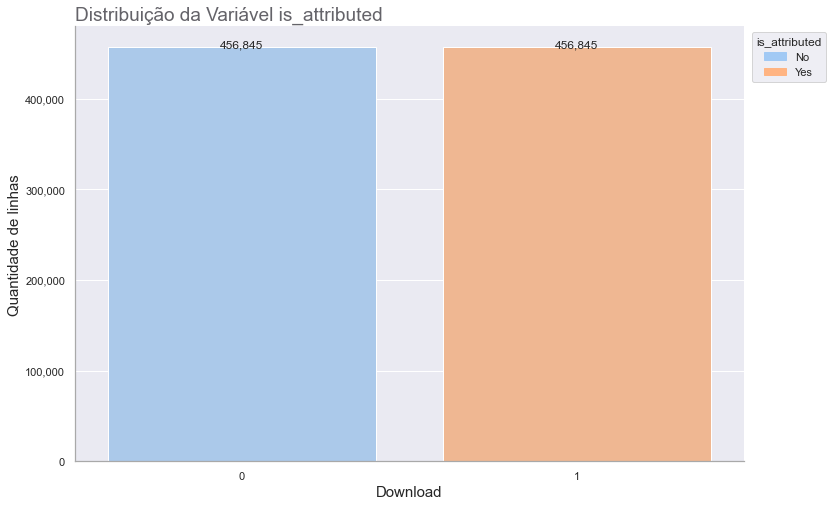

In [80]:
fig, ax = plt.subplots(figsize = (12,8))
palette = list(sns.color_palette('pastel'))[:len(train['is_attributed'].value_counts())]

sns.countplot(data = train, x = 'is_attributed', palette=palette, ax = ax)

ax.set_title("Distribuição da Variável is_attributed", fontsize = 19, loc = 'left', color = '#646369')
ax.set_xlabel("Download", fontsize = 15)
ax.set_ylabel("Quantidade de linhas", fontsize = 15)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

ax.spines['bottom'].set_color('darkgrey')
ax.spines['left'].set_color('darkgrey')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for p in ax.patches:
  _x = p.get_x() + p.get_width() / 2
  _y = p.get_y() + p.get_height()
  value = '{:,.0f}'.format(p.get_height())
  ax.text(_x, _y, value, ha="center")

handles = [plt.Rectangle((0,0),1,1, color=color) for color in palette]
ax.legend(handles, ['No', 'Yes'], title = 'is_attributed', loc='upper right', bbox_to_anchor = (1.13,1))

plt.show()

Conforme podemos verificar acima, realizamos o balanceamento da variável ```is_attributed```, possuindo agora 456.845 linhas para valores 0 (No) e 456.845 linhas valores para 1 (Yes).

[<img align="left" alt="Gmail" height="27" width="27" src="https://github.com/gustavolq/gustavolq/blob/main/assets/Gmail.png?raw=true" />][Gmail] <-- Me envie um E-mail  <br/> <br/>
[<img align="left" alt="LinkedIn" height="27" width="27" src="https://github.com/gustavolq/gustavolq/blob/main/assets/Linkedin.png?raw=true" />][LinkedIn] <-- Visualize meu LinkedIn<br/> <br/>
[<img align="left" alt="Kaggle" height="27" width="27" src="https://github.com/gustavolq/gustavolq/blob/main/assets/Kaggle.png?raw=true" />][Kaggle] <-- Visualize meu Kaggle <br/> <br/>
[<img align="left" alt="LinkedIn" height="27" width="27" src="https://github.com/gustavolq/gustavolq/blob/main/assets/Spotify.png?raw=true" />][Spotify] <-- Ouça uma música comigo

[Gmail]: mailto:gglquadra@gmail.com
[LinkedIn]: https://www.linkedin.com/in/gustavoquadra/
[Spotify]: https://open.spotify.com/user/x3z0vkgow695jglc3rvxpevnk
[Kaggle]: https://www.kaggle.com/gustavoluizquadra